<h1>IMPORT<h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import RocCurveDisplay

<h1>LER CSV<h1>

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<h1>Análise exploratória<h1>

In [3]:
display(train)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [6]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
train["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [9]:
train["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [10]:
train["Age"].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [11]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
train[train["Destination"] == "55 Cancri e"]["Transported"].value_counts()

True     1098
False     702
Name: Transported, dtype: int64

In [13]:
train[train["Destination"] == "PSO J318.5-22"]["Transported"].value_counts()

True     401
False    395
Name: Transported, dtype: int64

In [14]:
train[train["Destination"] == "TRAPPIST-1e"]["Transported"].value_counts()

False    3128
True     2787
Name: Transported, dtype: int64

In [15]:
train[train["HomePlanet"] == "Earth"]["Transported"].value_counts()

False    2651
True     1951
Name: Transported, dtype: int64

In [16]:
train[train["HomePlanet"] == "Europa"]["Transported"].value_counts()

True     1404
False     727
Name: Transported, dtype: int64

In [17]:
train[train["HomePlanet"] == "Mars"]["Transported"].value_counts()

True     920
False    839
Name: Transported, dtype: int64

In [18]:
train[train["CryoSleep"] == True]["Transported"].value_counts()

True     2483
False     554
Name: Transported, dtype: int64

In [19]:
train[train["CryoSleep"] == False]["Transported"].value_counts()

False    3650
True     1789
Name: Transported, dtype: int64

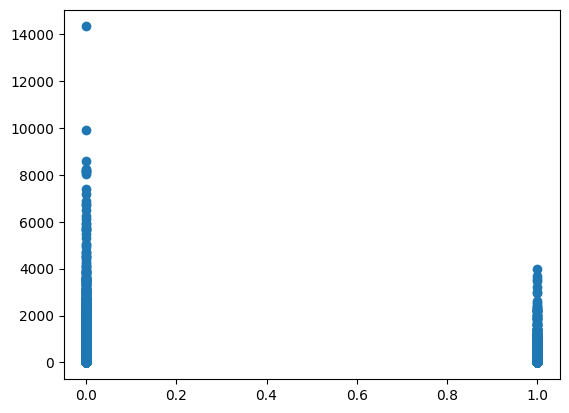

In [20]:
plt.scatter(train["Transported"], train["RoomService"])

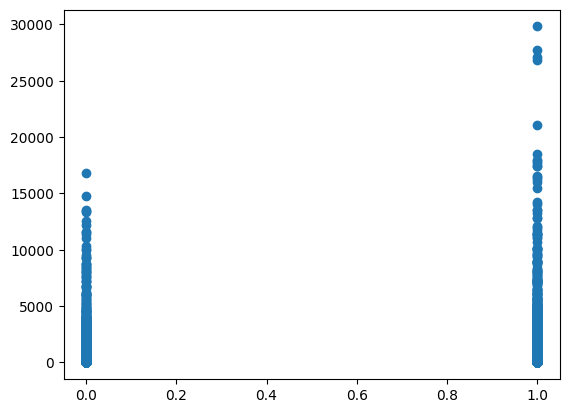

In [21]:
plt.scatter(train["Transported"], train["FoodCourt"])

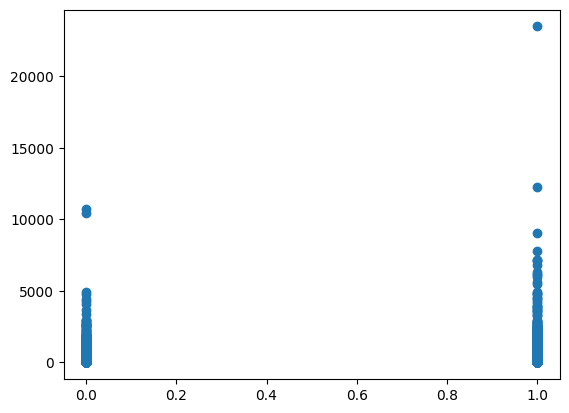

In [22]:
plt.scatter(train["Transported"], train["ShoppingMall"])

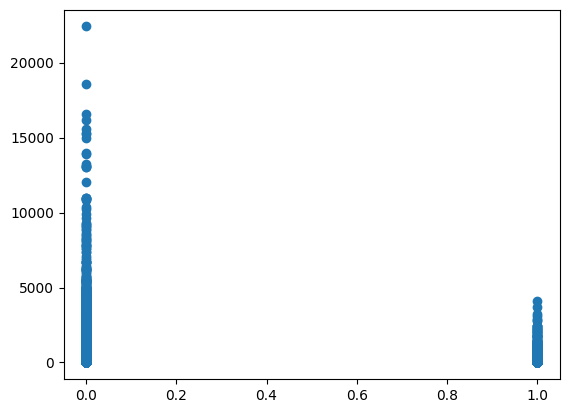

In [23]:
plt.scatter(train["Transported"], train["Spa"])

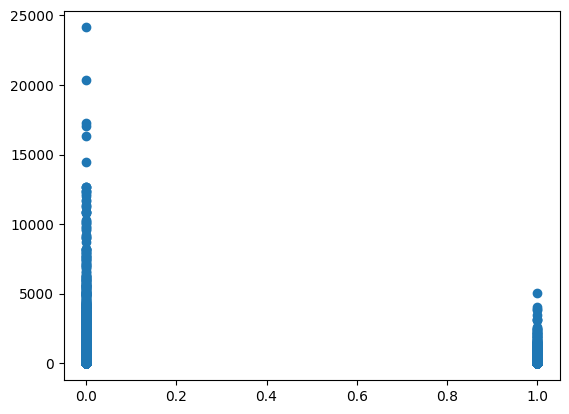

In [24]:
plt.scatter(train["Transported"], train["VRDeck"])

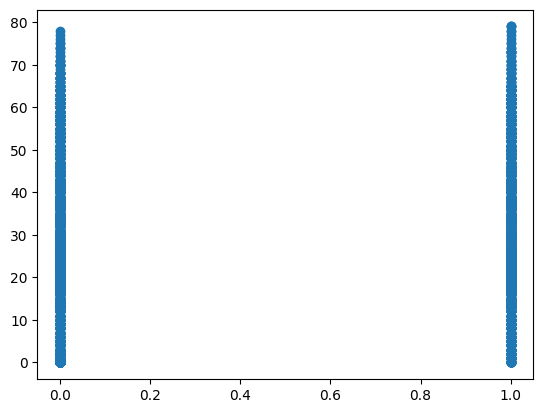

In [25]:
plt.scatter(train["Transported"] == False, train["Age"])

array([[<AxesSubplot: title={'center': 'FoodCourt'}>]], dtype=object)

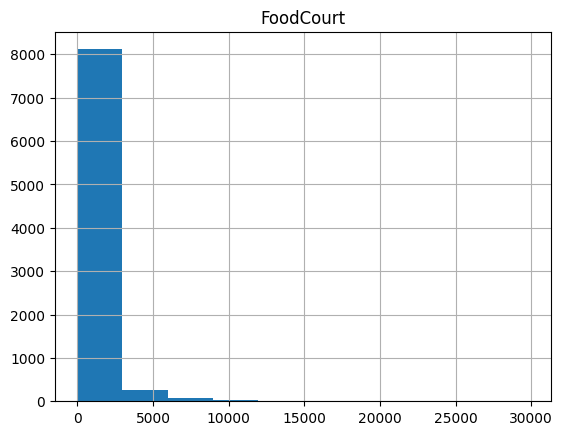

In [26]:
vars2 = ["FoodCourt", "Transported"]
train[vars2].hist()

<h1>Funções para tratar dados<h1>

In [27]:
def transforma_planet(valor):
    if valor == "Earth":
        return 0
    elif valor == "Mars":
        return 1
    elif valor == "Europa":
        return 2
    else:
        return -1

def transforma_transported(valor):
    if valor:
        return 1
    else:
        return 0

def transforma_cryo(valor):
    if valor == True:
        return 1
    elif valor == False:
        return 0
    else:
        return -1

def transforma_side(valor):
    valor = str(valor)
    if valor.count("/S") > 0:
        return 1
    elif valor.count("/P") > 0:
        return 0
    else:
        return -1

def transforma_destination(valor):
    valor = str(valor)
    if valor.count("TRAPPIST-1e") > 0:
        return 0
    elif valor.count("55 Cancri e") > 0:
        return 1
    elif valor.count("PSO J318.5-22") > 0:
        return 2
    else:
        return -1

def transforma_vip(valor):
    if valor == True:
        return 1
    elif valor == False:
        return 0
    else:
        return -1

def transforma_id(valor):
    return int(valor[:4])

def transforma_grupo(valor):
    grupo = int(valor[:4])
    quant_grupo = list(train["Id_num"]).count(grupo)
    return quant_grupo

def transforma_deck(valor):
    decks = ['B', 'F', 'A', 'G', 'n', 'E', 'D', 'C', 'T']

    valor = str(valor)
    deck = valor[:1]
    num_deck = decks.index(deck)

    return num_deck

def transforma_quarto(valor):
    valor = str(valor)

    if valor == "nan":
        return -1

    list_str = valor.split('/')

    quarto = list_str[1]

    return quarto
    

train["Planet_num"] = train["HomePlanet"].map(transforma_planet)
train["Transported_num"] = train["Transported"].map(transforma_transported)
train["Cryo_num"] = train["CryoSleep"].map(transforma_cryo)
train["Side_num"] = train["Cabin"].map(transforma_side)
train["Destination_num"] = train["Destination"].map(transforma_destination)
train["Vip_num"] = train["VIP"].map(transforma_vip)
train["Id_num"] = train["PassengerId"].map(transforma_id)
train["Quant_grupo"] = train["PassengerId"].map(transforma_grupo)
train["Deck_num"] = train["Cabin"].map(transforma_deck)
train["Quarto_num"] = train["Cabin"].map(transforma_quarto)


test["Planet_num"] = test["HomePlanet"].map(transforma_planet)
test["Cryo_num"] = test["CryoSleep"].map(transforma_cryo)
test["Side_num"] = test["Cabin"].map(transforma_side)
test["Destination_num"] = test["Destination"].map(transforma_destination)
test["Vip_num"] = test["VIP"].map(transforma_vip)
test["Id_num"] = test["PassengerId"].map(transforma_id)
test["Quant_grupo"] = test["PassengerId"].map(transforma_grupo)
test["Deck_num"] = test["Cabin"].map(transforma_deck)
test["Quarto_num"] = test["Cabin"].map(transforma_quarto)

In [28]:
train["Age"] = train["Age"].fillna(-1)

train["RoomService"] = train["RoomService"].fillna(-1)
train["FoodCourt"] = train["FoodCourt"].fillna(-1)
train["ShoppingMall"] = train["ShoppingMall"].fillna(-1)
train["Spa"] = train["Spa"].fillna(-1)
train["VRDeck"] = train["VRDeck"].fillna(-1)


test["Age"] = test["Age"].fillna(-1)

test["RoomService"] = test["RoomService"].fillna(-1)
test["FoodCourt"] = test["FoodCourt"].fillna(-1)
test["ShoppingMall"] = test["ShoppingMall"].fillna(-1)
test["Spa"] = test["Spa"].fillna(-1)
test["VRDeck"] = test["VRDeck"].fillna(-1)

In [29]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Planet_num,Transported_num,Cryo_num,Side_num,Destination_num,Vip_num,Id_num,Quant_grupo,Deck_num,Quarto_num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,2,0,0,0,0,0,1,1,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,1,0,1,0,0,2,1,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,2,0,0,1,0,1,3,2,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,2,0,0,1,0,0,3,2,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0,1,0,1,0,0,4,1,1,1


In [30]:
vars = ["Cryo_num", "Planet_num", "Side_num", "Destination_num", "Age", 
        "Vip_num", "RoomService", "FoodCourt", "ShoppingMall", "Spa", 
        "VRDeck", "Id_num", "Quant_grupo", "Deck_num", "Quarto_num"]

(array([ 499.,  219.,  179.,  367.,  780., 1172., 1127.,  939.,  727.,
         687.,  514.,  429.,  317.,  239.,  209.,  127.,   85.,   40.,
          23.,   14.]),
 array([-1.,  3.,  7., 11., 15., 19., 23., 27., 31., 35., 39., 43., 47.,
        51., 55., 59., 63., 67., 71., 75., 79.]),
 <BarContainer object of 20 artists>)

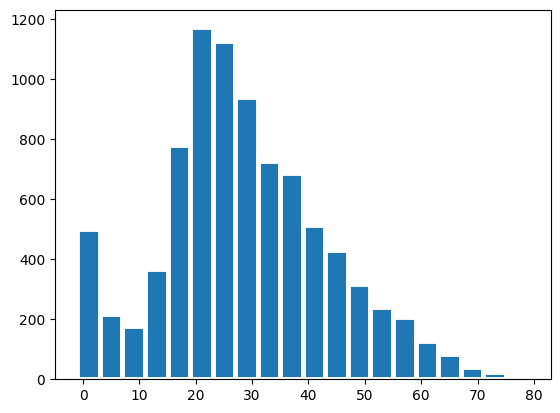

In [31]:
plt.hist(train["Age"], bins=20, linewidth=3.5, edgecolor="white")

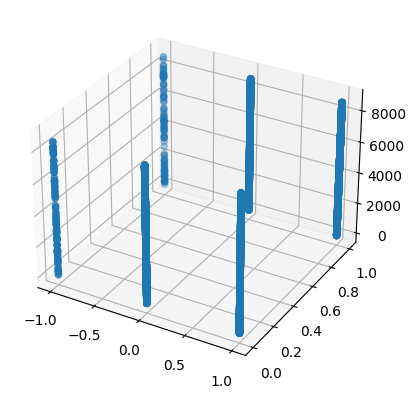

In [32]:
#plt.plot(train["Side_num"], train["Transported_num"])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train["Side_num"], train["Transported_num"], np.arange(1, 8694, 1))

In [33]:
X = train[vars]
y = train["Transported_num"]

<h1>TESTANDO COM RepeatedKFold<h1>

0.8043478260869565

0.8036576949620428

0.8039351052813255

0.8143547273982057

0.7977915804002761

0.8060062133241284

0.7981366459627329

0.8015873015873016

0.8032447359337246

0.8112491373360938

0.7974465148378191

0.8132550914739386

0.8026224982746721

0.7967563837129055

0.8125647221263376

0.8136645962732919

0.8015873015873016

0.7994477045219193

0.7998619737750172

0.8174603174603174

0.7970314118053159

0.7964113181504486

0.7943409247757074

0.8167069382119434

0.7984817115251898

0.8095238095238095

0.8129099068001381

0.810904071773637

0.8033126293995859

0.8011736278909216

Média:  0.8046591474057668
----------------------------


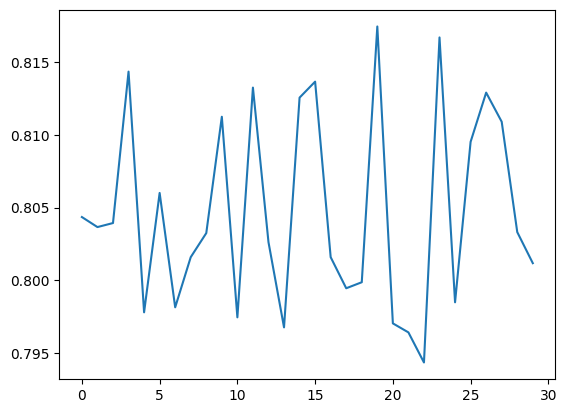

In [34]:
resultados = []
kf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=0)

for linhas_treino, linhas_valid in kf.split(X):
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=400, min_samples_leaf=4, n_jobs=-1, random_state=1)

    modelo.fit(X_treino, y_treino)

    acc = modelo.score(X_valid, y_valid)
    resultados.append(acc)
    print(acc)
    print()

print("Média: ", np.mean(resultados))
print("----------------------------")
plt.plot(resultados)

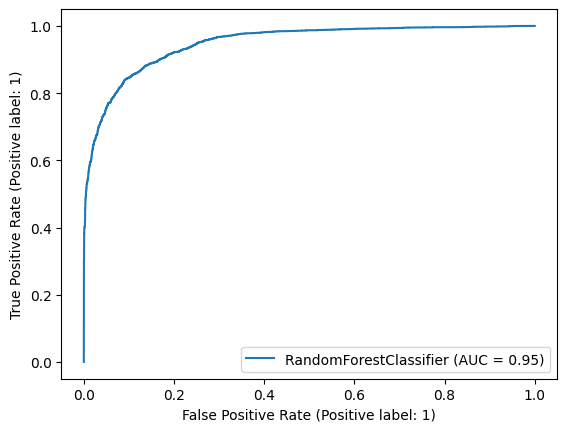

In [35]:
RocCurveDisplay.from_estimator(modelo, X, y)

<h1>Treinar modelo final com  todos os dados<h1>

In [36]:
modelo.fit(X, y)

RandomForestClassifier(min_samples_leaf=4, n_estimators=400, n_jobs=-1,
                       random_state=1)

In [37]:
X_prev = test[vars]
X_prev = X_prev.fillna(-1)
p = modelo.predict(X_prev)

def transforma_transported_b(valor):
    if valor == 1:
        return True
    else:
        return False

list_bol = []
for num in p:
    if num == 1:
        list_bol.append(True)
    else:
        list_bol.append(False)

<h1>Gerar CSV<h1>

In [38]:
sub = pd.Series(list_bol, index=test["PassengerId"], name="Transported")
sub.to_csv("predict.csv", header=True)